# Model Performance:

After running the LSTM model, I recorded several metrics, which I will graph in relation to the batch number below.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [6]:
#preparing metrics data to be graphed
logCSV = pd.read_csv("data/batchLog.csv")
log = logCSV.to_numpy()

batchNum = log[:,0]
batchBinAcc = log[:,1]
batchPrec = log[:,2]
batchRecall = log[:,3]
batchAuc = log[:,4]

#epoch validation data
epochs = pd.read_csv("data/epochLog.csv")
eps = epochs.to_numpy()

epNum = eps[:,0]/eps[0][0]
epBinAcc = eps[:,1]
epPrec = eps[:,2]
epRecall = eps[:,3]
epAuc = eps[:,4]

print(epNum)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


## training graphs

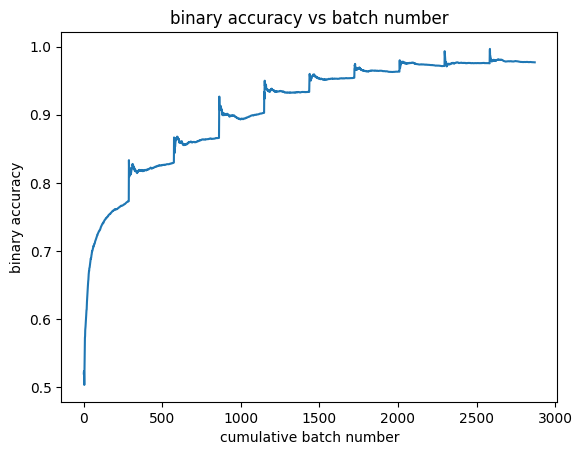

In [7]:
plt.plot(batchNum, batchBinAcc)
plt.xlabel('cumulative batch number')
plt.ylabel('binary accuracy')
plt.title('binary accuracy vs batch number')
plt.show()

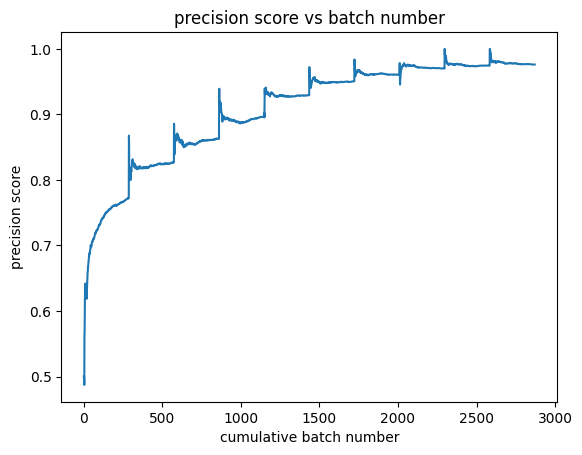

In [8]:
plt.plot(batchNum, batchPrec)
plt.xlabel('cumulative batch number')
plt.ylabel('precision score')
plt.title('precision score vs batch number')
plt.show()

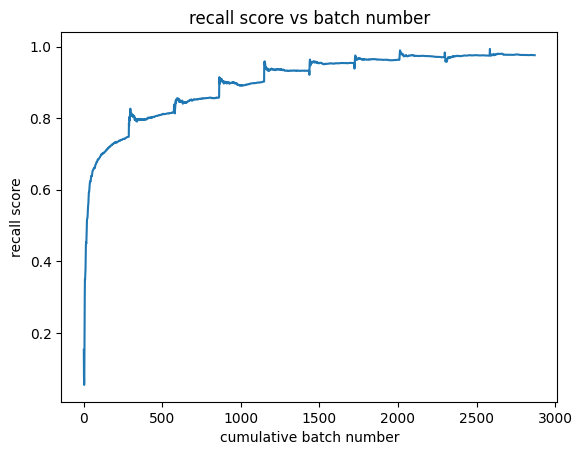

In [9]:
plt.plot(batchNum, batchRecall)
plt.xlabel('cumulative batch number')
plt.ylabel('recall score')
plt.title('recall score vs batch number')
plt.show()

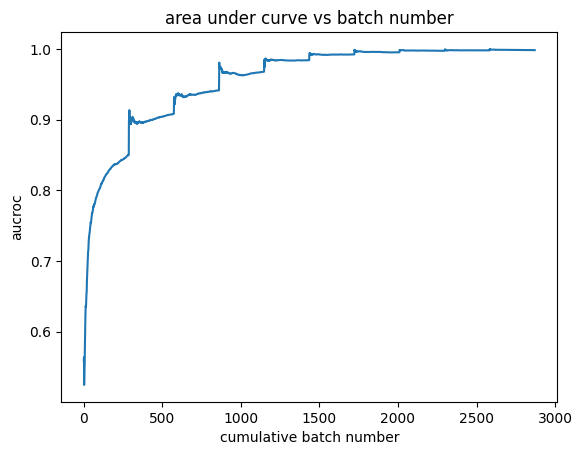

In [10]:
plt.plot(batchNum, batchAuc)
plt.xlabel('cumulative batch number')
plt.ylabel('aucroc')
plt.title('area under curve vs batch number')
plt.show()

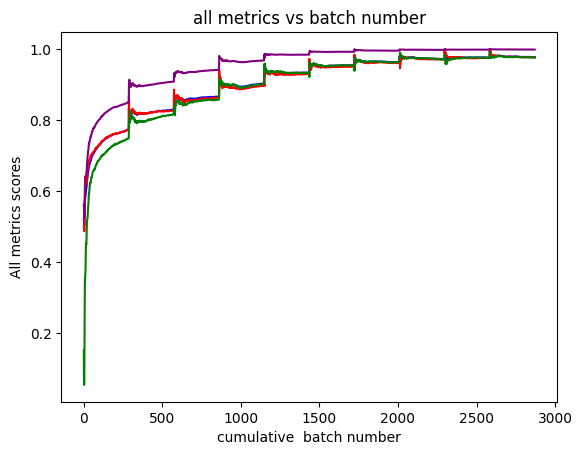

In [11]:
plt.plot(batchNum, batchBinAcc, label = "binary accuracy", color = 'blue')
plt.plot(batchNum, batchPrec, label = "precision", color = 'red')
plt.plot(batchNum, batchRecall, label = "recall", color = 'green')
plt.plot(batchNum, batchAuc, label = "auc roc", color = 'purple')
plt.xlabel('cumulative  batch number')
plt.ylabel('All metrics scores')
plt.title('all metrics vs batch number')
plt.show()

### analysis

As you can see from the graphs, as the batch number increases, the scores tend to improve, platueing as they get closer to 1, which is the maximum possible value for each metric. Additionally, very noticable spikes can be seen on every graph. This is the end and start of each epoch. For the most part this results in the model improving after hitting it, however interestingly, recall and precision in particular have pretty signficiant dips . After each epoch, the scores tend to fluctuate, however as more batches happen, it tends to stabalize back to a slow upwards climb. This is likely due to the model having only passed through a small amount of batches, and therefore being more suceptable to the small amount of data. 

Interestingly, when comparing all metrics, the model seems to have performed the best on AUCROC, and the weakest on recall, while accuracy and precision remain relatively similar. This is likely due to AUCROC representing how well the model is able to distinguish positive from negative classes as a whole. While the model isn't able to always have the highest accuracy, it is able to easily distinguish the classes apart. Towards the start of training, recall lags noticably behind. This is likely due to the model being too passive with positive predictions. However, as the model becomes increacingly more accurate, the recall falls in line with precision and accuracy due to just generally making less mistakes and finding postive labeled data that is harder to classify. While at the end of the 8th epoch, it dips pretty dramatically, it quickly corrects itself back in line with precision and accuracy after training on more batches in the epoch. 

## validation data results:

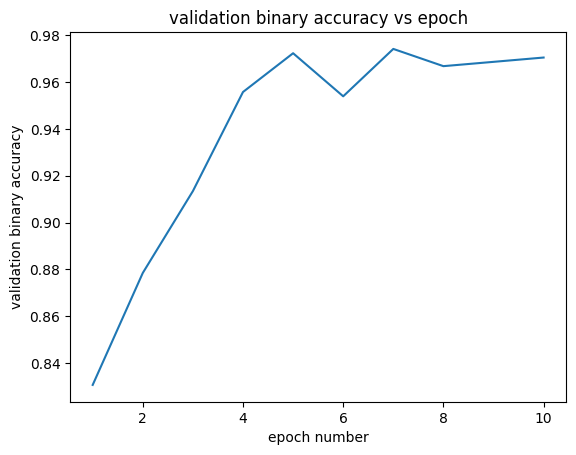

In [12]:
plt.plot(epNum, epBinAcc)
plt.xlabel('epoch number')
plt.ylabel('validation binary accuracy')
plt.title('validation binary accuracy vs epoch')
plt.show()

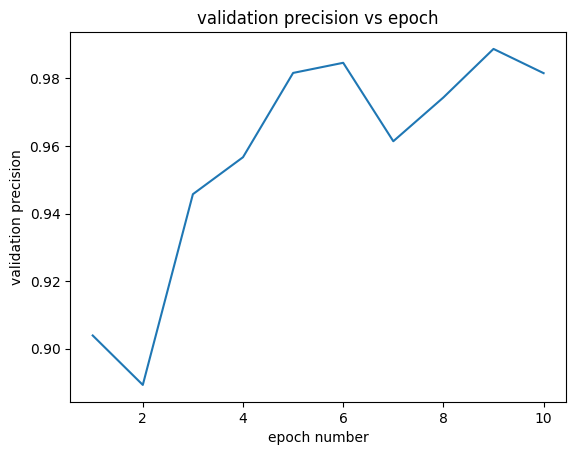

In [13]:
plt.plot(epNum, epPrec)
plt.xlabel('epoch number')
plt.ylabel('validation precision')
plt.title('validation precision vs epoch')
plt.show()

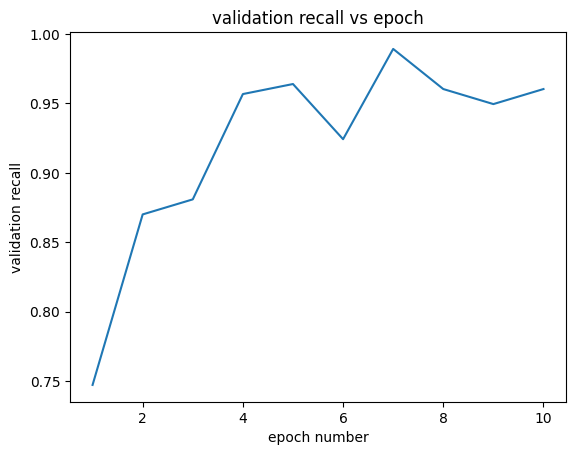

In [14]:
plt.plot(epNum, epRecall)
plt.xlabel('epoch number')
plt.ylabel('validation recall')
plt.title('validation recall vs epoch')
plt.show()

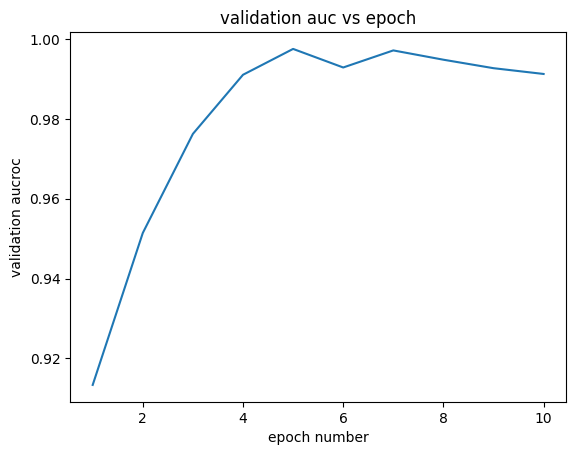

In [15]:
plt.plot(epNum, epAuc)
plt.xlabel('epoch number')
plt.ylabel('validation aucroc')
plt.title('validation auc vs epoch')
plt.show()

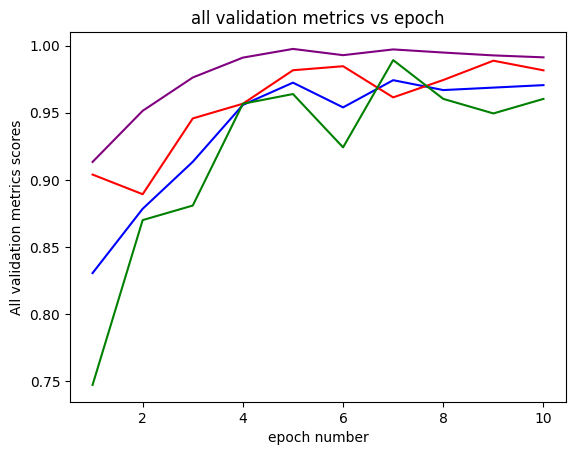

In [16]:
plt.plot(epNum, epBinAcc, label = "binary accuracy", color = 'blue')
plt.plot(epNum, epPrec, label = "precision", color = 'red')
plt.plot(epNum, epRecall, label = "recall", color = 'green')
plt.plot(epNum, epAuc, label = "auc roc", color = 'purple')
plt.xlabel('epoch number')
plt.ylabel('All validation metrics scores')
plt.title('all validation metrics vs epoch')
plt.show()

### analysis

As you can see from the graphs, the model continuously improves on the validation data for the first 5 epochs, however, around the 6-8th, starts to perform slightly worse on certain metrics. This is likely due to the model overfitting on train data. Much like the batch versus metric graphs, AUCROC gives the highest score, while recall gives the lowest score. However due to the overfitting, the lowest score jumps around slightly, however for most of the time it is recall. This means even on validation data, the model guesses positive significantly less times than is actually correct, and therefore has a higher rate of false negatives than other mistakes. 